# Library imports

In [1]:
import pandas as pd
import pylab as plt
import numpy as np
import seaborn as sns
from collections import defaultdict, Counter

In [2]:
#The link to read in the data from
file_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
breastcancer = pd.read_csv(file_link, header = None)

In [3]:
breastcancer.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Adding Headers: Scn, A2, A3, A4, A5, A6, A7, A8, A9, A10, CLASS

In [4]:
#Adding headers could have been done on line one while reading in the file, 
#we didn't need to do this part seperately

headers = ['Scn', 'A2',  'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'CLASS']

In [5]:
breastcancer.columns = headers

In [6]:
breastcancer.head()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Before we impute missing values `np.nan`, we need to assume that an `?` is considered to be a `np.nan`. Let us first count the number of `?` in all our columns.

In [7]:
breastcancer.isin(['?']).sum(axis=0)

Scn       0
A2        0
A3        0
A4        0
A5        0
A6        0
A7       16
A8        0
A9        0
A10       0
CLASS     0
dtype: int64

# Now let us calculate the number of `np.nan` BEFORE replacing `?` with `np.nan`.

In [8]:
breastcancer.isna().sum()

Scn      0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
A9       0
A10      0
CLASS    0
dtype: int64

In [9]:
breastcancer.replace('?', np.NaN, inplace = True) #Using the inplace keyword ensures you
                                                 #don't have to assign the result to another variable
                                                 #since the replacement takes place in-place

# Just to give ourselves a sanity check, the number of `?` should now be 0, since we replaced it with `np.nan`

In [10]:
breastcancer.isin(['?']).sum(axis=0)

Scn      0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
A9       0
A10      0
CLASS    0
dtype: int64

# Since we'converted our `?` to `np.nan`, the number of NaNs should now be 16

In [11]:
#Check for NaN values on Column A7
breastcancer[breastcancer['A7'].isnull()]

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
23,1057013,8,4,5,1,2,NaN,7,3,1,4
40,1096800,6,6,6,9,6,NaN,7,8,1,2
139,1183246,1,1,1,1,1,NaN,2,1,1,2
145,1184840,1,1,3,1,2,NaN,2,1,1,2
158,1193683,1,1,2,1,3,NaN,1,1,1,2
164,1197510,5,1,1,1,2,NaN,3,1,1,2
235,1241232,3,1,4,1,2,NaN,3,1,1,2
249,169356,3,1,1,1,2,NaN,3,1,1,2
275,432809,3,1,3,1,2,NaN,2,1,1,2
292,563649,8,8,8,1,2,NaN,6,10,1,4


# If want to know the total NaN values by column


In [12]:
breastcancer.isna().sum()

Scn       0
A2        0
A3        0
A4        0
A5        0
A6        0
A7       16
A8        0
A9        0
A10       0
CLASS     0
dtype: int64

# Let us look at our datatypes

In [13]:
breastcancer.dtypes

Scn       int64
A2        int64
A3        int64
A4        int64
A5        int64
A6        int64
A7       object
A8        int64
A9        int64
A10       int64
CLASS     int64
dtype: object

# The column A7 seems to be an object because it has a mixture of non-NaN ints and np.nan. Let us convert it to numeric

In [14]:
breastcancer["A7"] = pd.to_numeric(breastcancer["A7"])




In [15]:
breastcancer.head(n=30)

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


In [16]:
breastcancer['A7'].fillna((breastcancer['A7'].mean()), inplace=True) #inplace = True eliminates
                                                                     #the need to store in seperate
                                                                     #variable

#REFERENCE: https://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns

# Find the mean, median, standard deviation and variance of each of the attributes A2 to A10. So you will have total of nine mean, median, standard deviation and variance values.

In [17]:
breastcancer.describe()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Scatterplots between column numerical columns and `CLASS` may not be appropriate since `CLASS` is categorical.

# Histograms

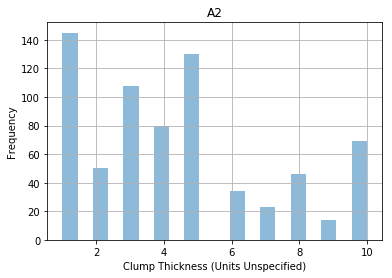

In [18]:
breastcancer.hist(column='A2', bins = 20, alpha = 0.5) #No titles for histograms
plt.xlabel('Clump Thickness (Units Unspecified)')
plt.ylabel('Frequency')
plt.show()

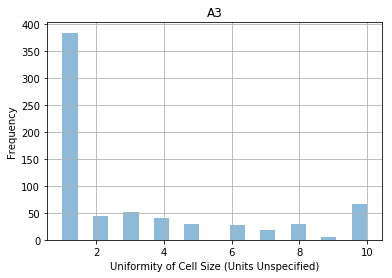

In [19]:
#Frequency Histogram of A3
breastcancer.hist(column='A3', bins = 20, alpha = 0.5) #No titles for histograms
plt.xlabel('Uniformity of Cell Size (Units Unspecified)')
plt.ylabel('Frequency')
plt.show()

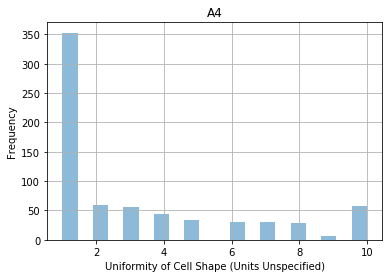

In [20]:
#Frequency Histogram of A4
breastcancer.hist(column='A4', bins = 20, alpha = 0.5) #No titles for histograms
plt.xlabel('Uniformity of Cell Shape (Units Unspecified)')
plt.ylabel('Frequency')
plt.show()

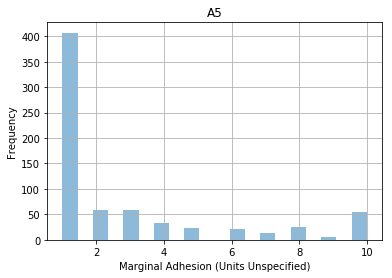

In [21]:
#Frequency Histogram of A5
breastcancer.hist(column='A5', bins = 20, alpha = 0.5) #No titles for histograms
plt.xlabel('Marginal Adhesion (Units Unspecified)')
plt.ylabel('Frequency')
plt.show()

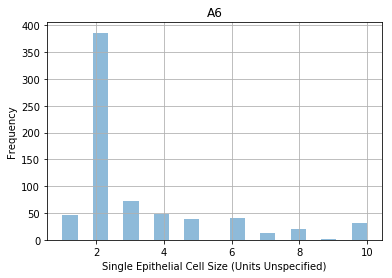

In [22]:
#Frequency Historgram of A6
breastcancer.hist(column='A6', bins = 20, alpha = 0.5) #No titles for histograms
plt.xlabel('Single Epithelial Cell Size (Units Unspecified)')
plt.ylabel('Frequency')
plt.show()

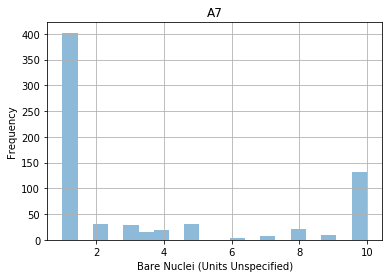

In [23]:
#Frequency Histogram of A7
breastcancer.hist(column='A7', bins = 20, alpha = 0.5) #No titles for histograms
plt.xlabel('Bare Nuclei (Units Unspecified)')
plt.ylabel('Frequency')
plt.show()

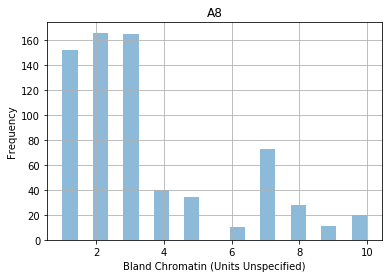

In [24]:
#Histogram of A8
breastcancer.hist(column='A8', bins = 20, alpha = 0.5) #No titles for histograms
plt.xlabel('Bland Chromatin (Units Unspecified)')
plt.ylabel('Frequency')
plt.show()

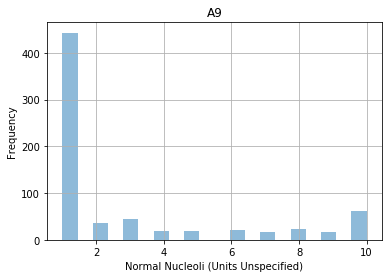

In [25]:
#Histogram of A9
breastcancer.hist(column='A9', bins = 20, alpha = 0.5) #No titles for histograms
plt.xlabel('Normal Nucleoli (Units Unspecified)')
plt.ylabel('Frequency')
plt.show()

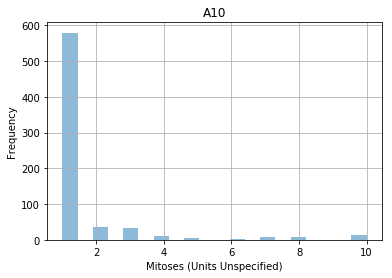

In [26]:
#Histogram of A10
breastcancer.hist(column='A10', bins = 20, alpha = 0.5) #No titles for histograms
plt.xlabel('Mitoses (Units Unspecified)')
plt.ylabel('Frequency')
plt.show()

# Converting the CLASS column into categorical

In [27]:
breastcancer['CLASS'] = breastcancer['CLASS'].astype(str)

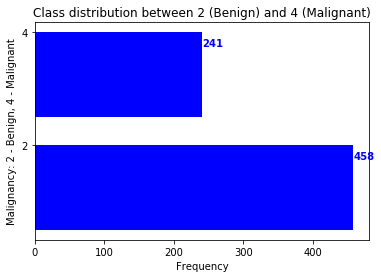

In [28]:
#Plot a Bar Plot of CLASS
import matplotlib.pyplot as plt

a = breastcancer.CLASS.value_counts()

x = list(a.index)
y = list(a)

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v + .25, i + .25, str(v), color='blue', fontweight='bold') #add value labels into bar
plt.title('Class distribution between 2 (Benign) and 4 (Malignant)')
plt.xlabel('Frequency')
plt.ylabel('Malignancy: 2 - Benign, 4 - Malignant')
plt.show()

# Pairwise Correlations

In [29]:
# Don't know if titles, xlabels and ylabels are appropriate for this one

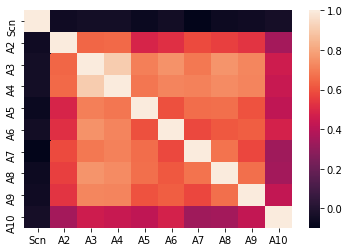

In [30]:
corr = breastcancer.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)



The scale on the right o the correlation plot indicates the level of correlation. The lighter the color, the higher the correlation! The darker the color, the less correlation there is (DOES NOT BEEN THEY ARE NEGATIVELY CORRELATED, IT SIMPLY MEANS THERE IS NO CORRELATION)

# Numerical Table of the Correlation Coefficients. Value > 0.5 = Somewhat positively correlated

In [31]:
breastcancer.corr()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10
Scn,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.098668,-0.060051,-0.052072,-0.034901
A2,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.587300,0.558428,0.535835,0.350034
A3,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686801,0.755721,0.722865,0.458693
A4,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.709606,0.735948,0.719446,0.438911
A5,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.665049,0.666715,0.603352,0.417633
A6,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.581261,0.616102,0.628881,0.479101
A7,-0.098668,0.587300,0.686801,0.709606,0.665049,0.581261,1.000000,0.675896,0.577362,0.338740
A8,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.675896,1.000000,0.665878,0.344169
A9,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.577362,0.665878,1.000000,0.428336
A10,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.338740,0.344169,0.428336,1.000000


## A3 seems to be positively correlation with all columns from A4 to A9! 

## A3 vs. A4 - Positive Correlation Scatterplot

Text(0.5,1,'Correlation between x = A3 vs. y = A4')

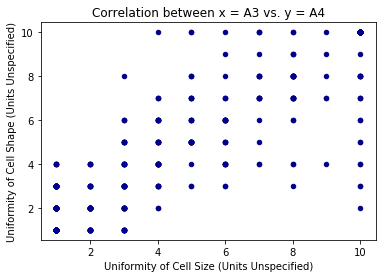

In [32]:
breastcancer.plot.scatter(x='A3', y='A4', c='DarkBlue')
plt.xlabel('Uniformity of Cell Size (Units Unspecified)')
plt.ylabel('Uniformity of Cell Shape (Units Unspecified)')
plt.title("Correlation between x = A3 vs. y = A4")

## A3 vs. A5 - Positive Correlation Scatterplot

Text(0.5,1,'Correlation between x = A3 vs. y = A5')

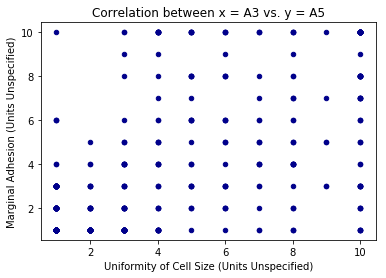

In [33]:
breastcancer.plot.scatter(x='A3', y='A5', c='DarkBlue')
plt.xlabel('Uniformity of Cell Size (Units Unspecified)')
plt.ylabel('Marginal Adhesion (Units Unspecified)')
plt.title("Correlation between x = A3 vs. y = A5")

## A3 vs. A6 - Positive Correlation Scatterplot

Text(0.5,1,'Correlation between x = A3 vs. y = A6')

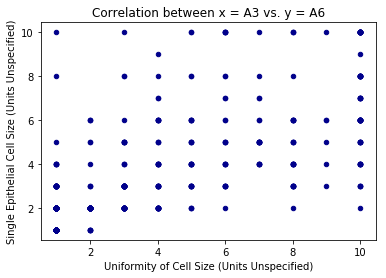

In [34]:
breastcancer.plot.scatter(x='A3', y='A6', c='DarkBlue')
plt.xlabel('Uniformity of Cell Size (Units Unspecified)')
plt.ylabel('Single Epithelial Cell Size (Units Unspecified)')
plt.title("Correlation between x = A3 vs. y = A6")

## A3 vs. A7 - Positive Correlation Scatterplot

Text(0.5,1,'Correlation between x = A3 vs. y = A7')

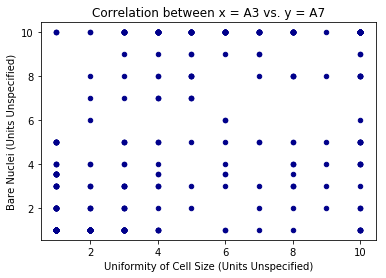

In [35]:
breastcancer.plot.scatter(x='A3', y='A7', c='DarkBlue')
plt.xlabel('Uniformity of Cell Size (Units Unspecified)')
plt.ylabel('Bare Nuclei (Units Unspecified)')
plt.title("Correlation between x = A3 vs. y = A7")

## A3 vs. A8 - Positive Correlation Scatterplot

Text(0.5,1,'Correlation between x = A3 vs. y = A8')

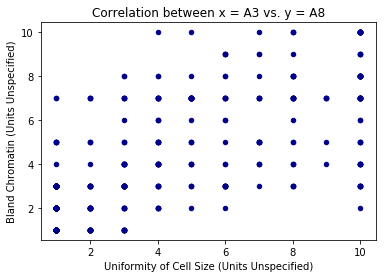

In [36]:
breastcancer.plot.scatter(x='A3', y='A8', c='DarkBlue')
plt.xlabel('Uniformity of Cell Size (Units Unspecified)')
plt.ylabel('Bland Chromatin (Units Unspecified)')
plt.title("Correlation between x = A3 vs. y = A8")

## A3 vs. A9 - Positive Correlation Scatterplot

Text(0.5,1,'Correlation between x = A3 vs. y = A9')

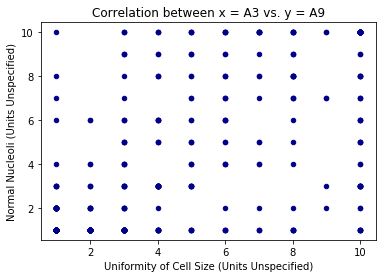

In [37]:
breastcancer.plot.scatter(x='A3', y='A9', c='DarkBlue')
plt.xlabel('Uniformity of Cell Size (Units Unspecified)')
plt.ylabel('Normal Nucleoli (Units Unspecified)')
plt.title("Correlation between x = A3 vs. y = A9")

# Here is the fastest way to look at all the correlation plots in a single go, but you have to use `seaborn`

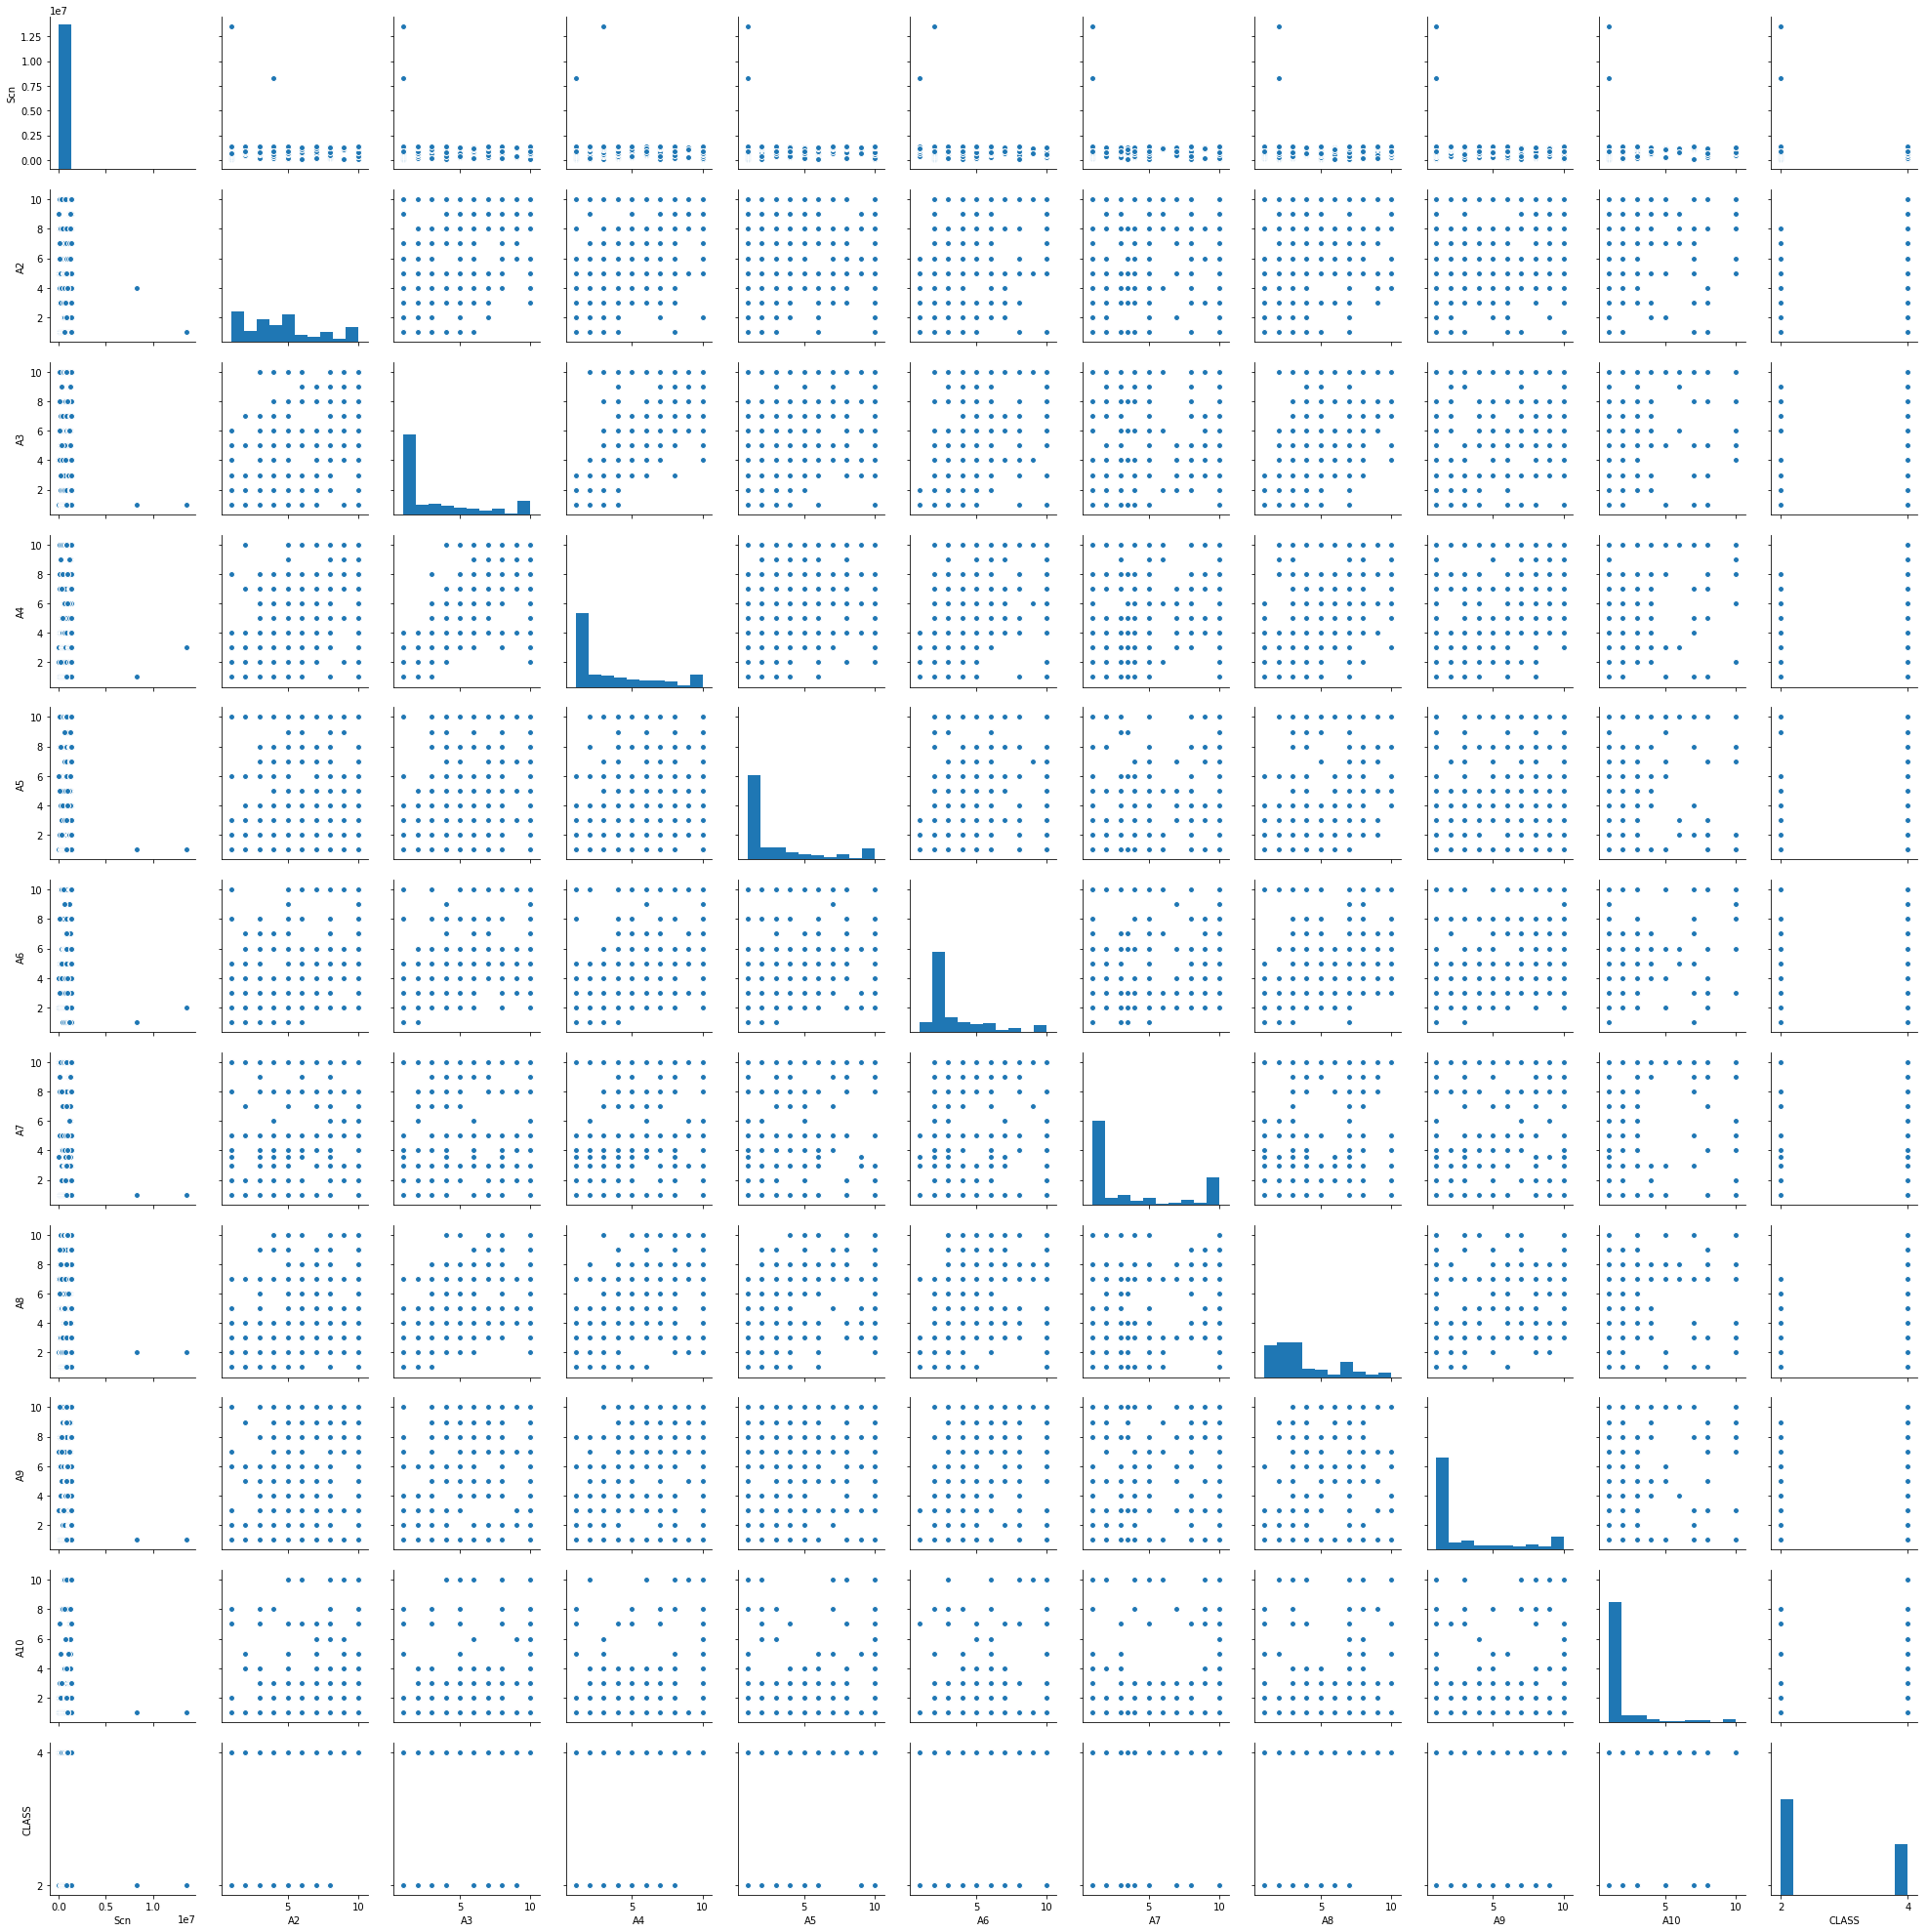

In [38]:
sns.pairplot(breastcancer)

Observations:
    
    -Columns A2 through A10 should be renamed according to what data they are referencing, e.g., instrument readings, levels, etc.
    -All numeric data should be standardized without a decimal place.